# **Análise de dados: Série de Preços de Combustíveis**

Os dados coletados pela ANP são disponibilizados no site do governo federal, no portal de dados abertos, e compõem a Série Histórica de Preços de Combustíveis. O arquivo original da base de dados estará anexado a este repositório. Este projeto tem como objetivo a prática e o desenvolvimento da linguagem Python e suas aplicações na análise exploratória de dados.


In [16]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

O arquivo está no formato CSV, com vírgulas (,) como delimitadores.

In [17]:
# Leitura do arquivo
df = pd.read_csv('dados_anp.csv', sep=',', encoding='utf-8')

In [18]:
# Informações da quantidaade de linhas e colunas do dataframe
df.shape

(477154, 16)

In [19]:
# Informações mais detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477154 entries, 0 to 477153
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     477154 non-null  object 
 1   Estado - Sigla     477154 non-null  object 
 2   Municipio          477154 non-null  object 
 3   Revenda            477154 non-null  object 
 4   CNPJ da Revenda    477154 non-null  object 
 5   Nome da Rua        477154 non-null  object 
 6   Numero Rua         477089 non-null  object 
 7   Complemento        110830 non-null  object 
 8   Bairro             476286 non-null  object 
 9   Cep                477154 non-null  object 
 10  Produto            477154 non-null  object 
 11  Data da Coleta     477154 non-null  object 
 12  Valor de Venda     477154 non-null  float64
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  477154 non-null  object 
 15  Bandeira           477154 non-null  object 
dtypes:

Considerando a ausência de valores significativos e a potencial influência negativa nos resultados, foram removidas as colunas com dados faltantes.

In [20]:
# Exclusão de colunas irrelevantes e com dados faltantes
df.drop(columns=['Regiao - Sigla', 'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Cep','Bairro', 'Valor de Compra', 'Bandeira'])

,Estado - Sigla,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida
0,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA,2024-01-01,5.68,R$ / litro
1,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,GASOLINA ADITIVADA,2024-01-01,5.68,R$ / litro
2,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,DIESEL S10,2024-01-01,5.93,R$ / litro
3,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,2024-01-01,3.99,R$ / litro
4,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,GASOLINA,2024-01-01,5.48,R$ / litro
...,...,...,...,...,...,...,...
477149,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,ETANOL,2024-06-28,3.99,R$ / litro
477150,MA,CAXIAS,MAXXI PETRONORTE COMBUSTIVEIS E DERIVADOS LTDA,GASOLINA,2024-06-28,5.79,R$ / litro
477151,MA,CAXIAS,MAXXI PETRONORTE COMBUSTIVEIS E DERIVADOS LTDA,GASOLINA ADITIVADA,2024-06-28,5.89,R$ / litro
477152,MA,CAXIAS,MAXXI PETRONORTE COMBUSTIVEIS E DERIVADOS LTDA,DIESEL S10,2024-06-28,5.64,R$ / litro


Conversão das colunas:

In [21]:
df["Data da Coleta"] = pd.to_datetime(df["Data da Coleta"]).dt.date
df["Valor de Venda"] = df["Valor de Venda"].astype(str).str.replace(',', '.').astype(float)

In [22]:
# Total de revendedores e municipios
revendedores = df['Revenda'].nunique()
total_municipios = df['Municipio'].nunique()
print(f'Há cerca de {revendedores} revendedores de combustivéis distintos nesta base de dados.\nE {total_municipios} municipios.')

Há cerca de 8234 revendedores de combustivéis distintos nesta base de dados.
E 459 municipios.


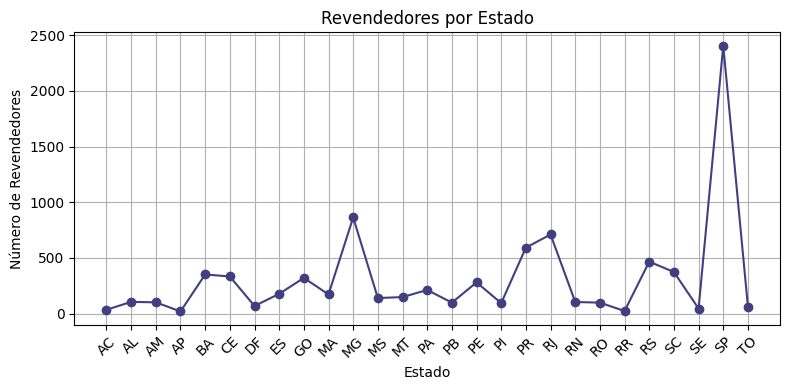

In [23]:
municipios = df.groupby('Estado - Sigla')['Revenda'].nunique()
# Criação do Gráfico
fig, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("mako", as_cmap=True)
ax.plot(municipios.index, municipios.values, marker='o', color=palette(0.3))
ax.set_title('Revendedores por Estado')
ax.set_xlabel('Estado')
ax.set_ylabel('Número de Revendedores')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

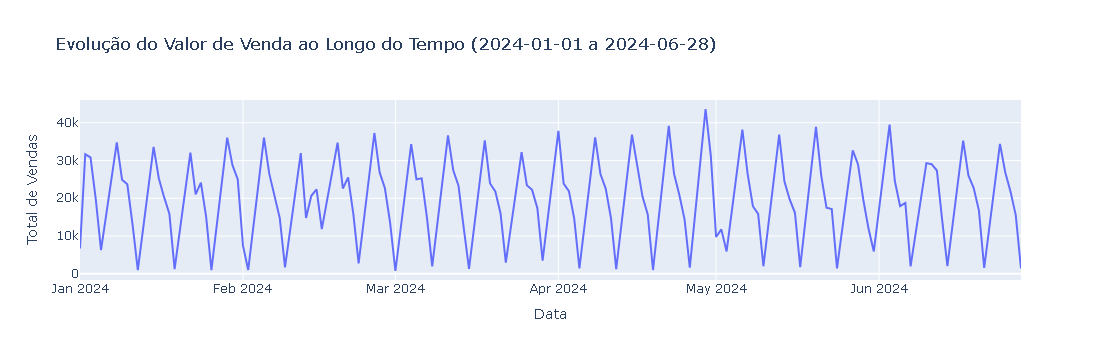

In [24]:
import plotly.express as px
df_evolucao = df.groupby('Data da Coleta')['Valor de Venda'].sum().reset_index()
data_minima = df['Data da Coleta'].min()
data_maxima = df['Data da Coleta'].max()
df_evolucao.rename(columns={'Data da Coleta': 'Data', 'Valor de Venda': 'Total de Vendas'}, inplace=True)
fig = px.line(df_evolucao, x='Data', y='Total de Vendas',
              title=f'Evolução do Valor de Venda ao Longo do Tempo ({data_minima} a {data_maxima})', line_shape='linear')
fig.show()
fig.show()

In [25]:
vendas_por_dia = df.groupby(df['Data da Coleta'])['Valor de Venda'].sum()
dia_vendas_min = vendas_por_dia.idxmin()
valor_min_vendas = vendas_por_dia.min()
dia_vendas_max = vendas_por_dia.idxmax()
valor_max_vendas = vendas_por_dia.max()
print(f"Dia com menor número de vendas: {dia_vendas_min} com R$ {valor_min_vendas:.2f}\nDia com maior número de vendas: {dia_vendas_max} com R$ {valor_max_vendas:.2f}")

Dia com menor número de vendas: 2024-03-01 com R$ 746.51
Dia com maior número de vendas: 2024-04-29 com R$ 43625.59


In [26]:
data_min = pd.to_datetime('2024-03-01').date()
municipios_dia_min = df[df['Data da Coleta'] == data_min].groupby(['Municipio', 'Estado - Sigla', 'Data da Coleta'])['Valor de Venda'].sum()
municipios_dia_min = municipios_dia_min.sort_values(ascending=True)
print(municipios_dia_min)

Municipio       Estado - Sigla  Data da Coleta
CRATO           CE              2024-03-01         11.57
TIMOTEO         MG              2024-03-01         14.73
PARANAVAI       PR              2024-03-01         82.56
CAMPINA GRANDE  PB              2024-03-01         85.87
ARARANGUA       SC              2024-03-01         94.36
XANXERE         SC              2024-03-01         97.08
MAGE            RJ              2024-03-01        113.31
COLOMBO         PR              2024-03-01        247.03
Name: Valor de Venda, dtype: float64


No dia de menor faturamento do período (1º de março de 2024), **Crato (CE)** liderou o ranking de menores receitas, enquanto **Colombo (PR)** obteve o melhor desempenho.

In [27]:
vendas_por_revendedor = df[df['Data da Coleta'] == data_min].groupby('Revenda')['Valor de Venda'].sum()
top_3_revendedores = vendas_por_revendedor.sort_values(ascending=False).head(3)
print(top_3_revendedores)

Revenda
RIZZOTTO & CIA LTDA                      77.49
AUTO POSTO VIA DA UVA LTDA               33.12
POSTO DE GASOLINA RENAZA DE MAGE LTDA    32.24
Name: Valor de Venda, dtype: float64


A análise dos dados de 2024-03-01 revelou que, apesar do baixo volume de vendas, a **RIZZOTTO & CIA LTDA** obteve a maior receita, com **RS 77.49**
Posteriormente, a **DEL REYCOMERCIAL DE COMBUSTIVEIS LTDA** registrou a menor, com apenas **R$ 8,92**.

In [28]:
data_max = pd.to_datetime('2024-04-29').date()
municipios_dia_max = df[df['Data da Coleta'] == data_max].groupby(['Municipio', 'Estado - Sigla', 'Data da Coleta'])['Valor de Venda'].sum()
municipios_dia_max = municipios_dia_max.sort_values(ascending=False)
display(municipios_dia_max)

Municipio               Estado - Sigla  Data da Coleta
SAO PAULO               SP              2024-04-29        3687.80
RIO DE JANEIRO          RJ              2024-04-29        1110.69
MANAUS                  AM              2024-04-29         826.30
GOIANIA                 GO              2024-04-29         754.25
BRASILIA                DF              2024-04-29         746.72
                                                           ...   
SANTO ANTONIO DE JESUS  BA              2024-04-29          17.07
BACABAL                 MA              2024-04-29          16.62
CABEDELO                PB              2024-04-29          15.69
SANTA INES              MA              2024-04-29          11.58
MANHUACU                MG              2024-04-29           9.83
Name: Valor de Venda, Length: 209, dtype: float64

In [29]:
vendas_por_revendedor_max = df[df['Data da Coleta'] == data_max].groupby('Revenda')['Valor de Venda'].sum()
top_3_revendedores_max = vendas_por_revendedor_max.sort_values(ascending=False).head(3)
display(top_3_revendedores_max)

Revenda
CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    660.56
SIM REDE DE POSTOS LTDA                   264.18
POSTO ICCAR LTDA                          238.98
Name: Valor de Venda, dtype: float64

Dentre os municípios mencionados, o gráfico a seguir apresenta o ranking dos 10 municípios com os maiores valores de venda no período de 01/01/2024 a 28/06/2024

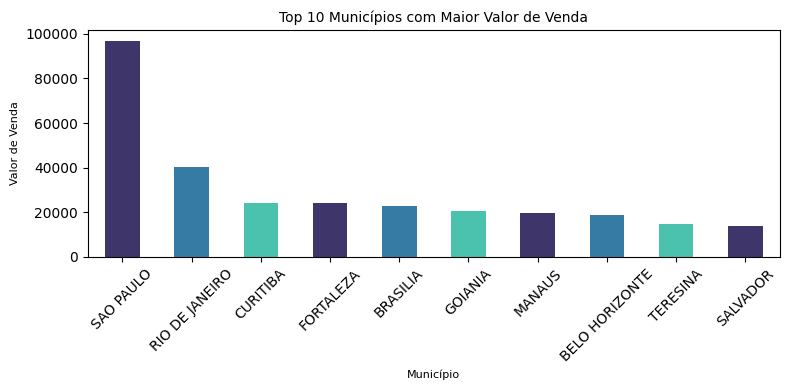

In [30]:
vendas_municipios = df.groupby('Municipio')['Valor de Venda'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
palette = sns.color_palette("mako", 3)
vendas_municipios.head(10).plot(kind='bar', color=palette)
plt.title('Top 10 Municípios com Maior Valor de Venda', fontsize=10)
plt.xlabel('Município', fontsize=8)
plt.ylabel('Valor de Venda', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
vendas_municipios_max = vendas_municipios.head(1)
print(f'{vendas_municipios_max}')

Municipio
SAO PAULO    96976.68
Name: Valor de Venda, dtype: float64


- São Paulo (SP) teve o maior faturamento entre os municípios analisados

In [32]:
# Top municipios com menor valor de venda
vendas_municipios = df.groupby(['Municipio', 'Estado - Sigla'])['Valor de Venda'].sum().sort_values(ascending=True).head(10)
print(vendas_municipios)

Municipio                Estado - Sigla
VERA CRUZ                BA                 353.04
SAPUCAIA                 RJ                1151.70
CAMETA                   PA                1368.45
SANTA INES               MA                1524.65
PRESIDENTE VENCESLAU     SP                1703.79
TEFE                     AM                1735.91
ITABIRA                  MG                1743.48
OURO PRETO               MG                1760.93
BOM DESPACHO             MG                1889.41
SANTA CRUZ DO RIO PARDO  SP                1896.48
Name: Valor de Venda, dtype: float64


- De acordo com os resultados da análise, Vera Cruz, BA, apresentou o menor indicador de receita proveniente de vendas

Os valores médios de cada produto estão apresentados abaixo:

In [33]:
media_valor_venda = df.groupby('Produto')['Valor de Venda'].mean().round(2)
print(media_valor_venda)

Produto
DIESEL                5.94
DIESEL S10            6.00
ETANOL                3.90
GASOLINA              5.78
GASOLINA ADITIVADA    5.97
GNV                   4.74
Name: Valor de Venda, dtype: float64


A tabela subsequente detalha o valor mínimo de cada produto, bem como a data e seu revendedor correspondente.

In [34]:
df_vendas_valor_min = df.loc[df.groupby('Produto')['Valor de Venda'].idxmin()]
df_vendas_valor_min = df_vendas_valor_min[['Produto', 'Data da Coleta','Valor de Venda', 'Revenda']]
df_vendas_valor_min.rename(columns={'Valor de Venda': 'Valor_Minimo', 'Revenda': 'Revendedor'}, inplace=True)
df_vendas_valor_min= df_vendas_valor_min.reset_index(drop=True)
display(df_vendas_valor_min)

,Produto,Data da Coleta,Valor_Minimo,Revendedor
0,DIESEL,2024-01-04,4.69,CARVALHO &CARVALHO LTDA
1,DIESEL S10,2024-01-24,4.99,ALCANTARA & FARIA LTDA
2,ETANOL,2024-01-24,2.63,AUTO POSTO NOVA VENEZA LTDA.
3,GASOLINA,2024-01-23,4.55,POSTO DE SERVICO VENEZA LTDA
4,GASOLINA ADITIVADA,2024-01-23,4.69,LIRIOS SERVICOS AUTOMOTIVOS LTDA
5,GNV,2024-01-09,3.54,AUTO POSTO SANTOS DUMONT EIRELI


Abaixo, como complemento das informações anteriores, o valor máximo de cada produto e seu respectivo revendedor

In [35]:
df_vendas_valor_max = df.loc[df.groupby('Produto')['Valor de Venda'].idxmax()]
df_vendas_valor_max = df_vendas_valor_max[['Produto', 'Data da Coleta', 'Valor de Venda', 'Revenda']]
df_vendas_valor_max.rename(columns={'Valor de Venda': 'Valor_Máximo', 'Revenda': 'Revendedor'}, inplace=True)
df_vendas_valor_max= df_vendas_valor_max.reset_index(drop=True)
display(df_vendas_valor_max)

,Produto,Data da Coleta,Valor_Máximo,Revendedor
0,DIESEL,2024-01-09,8.19,MARCOS A.S. CORDEIRO
1,DIESEL S10,2024-01-04,8.89,OMEGA COMERCIO DE DERIVADOS DE PETROLEO E TRAN...
2,ETANOL,2024-01-02,6.60,AUTO POSTO NACIONAL LTDA.
3,GASOLINA,2024-01-15,7.99,SENA PARK AUTO POSTO LTDA
4,GASOLINA ADITIVADA,2024-02-14,8.89,AUTO POSTO DINAMARCA LTDA
5,GNV,2024-01-10,6.69,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA


Para melhor visualização dos dados, o gráfico a seguir apresenta um comparativo de valores mínimos e máximos de cada produto listado anteriormente

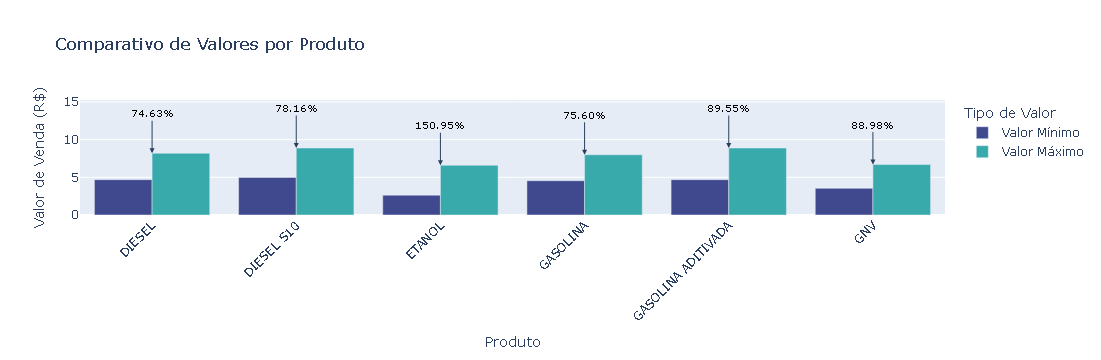

In [36]:
import plotly.graph_objects as go
df_comparativo = pd.merge(df_vendas_valor_min, df_vendas_valor_max, on='Produto')
df_comparativo['Porcentagem_Diferenca'] = ((df_comparativo['Valor_Máximo'] - df_comparativo['Valor_Minimo']) / df_comparativo['Valor_Minimo']) * 100
palette = sns.color_palette("mako", 2).as_hex()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_comparativo['Produto'],
    y=df_comparativo['Valor_Minimo'],
    name='Valor Mínimo',
    marker_color=palette[0]
))
fig.add_trace(go.Bar(
    x=df_comparativo['Produto'],
    y=df_comparativo['Valor_Máximo'],
    name='Valor Máximo',
    marker_color=palette[1]
))
for i, row in df_comparativo.iterrows():
    fig.add_annotation(
        x=row['Produto'], y=row['Valor_Máximo'], 
        text=f"{row['Porcentagem_Diferenca']:.2f}%", showarrow=True, 
        arrowhead=2, ax=0, ay=-40,
        font=dict(size=10, color="black")
    )
fig.update_layout(title='Comparativo de Valores por Produto',
    xaxis_title='Produto', yaxis_title='Valor de Venda (R$)', barmode='group', xaxis_tickangle=-45,
    legend_title="Tipo de Valor", showlegend=True
)
fig.show()